In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import math
import scipy.special as spec
import statistics as stats
from tqdm import tqdm

In [2]:
#define parameters
#the lattice has is of dimentions dim*a x dim*b
T = 10000
a = 1             #primitive cell lenght
b = np.sqrt(3/4)  #primitive cell height
dim = 10
N = dim**2
dt = 10**(-3)
global pos

### Random vortex positions
Set the bellow cell to code to run a simultion starting with random positions.

In [3]:
#initialize vortexes at random positions
pos = np.empty((T,2,N))              
#pos is a 3D array with the first dimention being time, second x or y coordinate and last the vortex number
for i in range(N):
    pos[0][0][i] = rand.uniform(0,dim*a) #x coordinate of each vortex
    pos[0][1][i] = rand.uniform(0,dim*b) #y coordinate of each vortex

### Ground state test
Set the bellow cell to code to run a simultion from a predifined triangular lattice.

#test ground state

A = np.arange(0,dim*a + 1, dtype = float)
B = np.arange(0,dim*b + 1, dtype = float)

N = len(A)*len(B) 
#pos0 = np.empty((T,2,len(A)*len(B))) 
pos = np.empty((T,2,len(A)*len(B)))
pos[0][0] = np.tile(B,len(A))
pos[0][1] = np.repeat(A,len(B))

#Code to disloge a square lattince in a triangle one
for i in range(len(A)):
    #print((i+1) % 2)
    if i % 2 == 0:
        for j in range(i * len(B), (i+1)*len(B)):
            #print(j,img_x[j])
            pos[0][0][j] += a/2

The vortexes will be put in a square from 0 to 2. The blue vortices plotted below are image ones. The orange ones are actual simuated vortexes

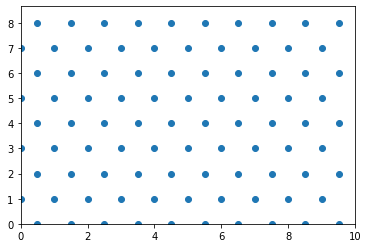

In [23]:
#initial setup plotted
fig, ax = plt.subplots()

# plt.plot(img_x, img_y,'o')
plt.plot(pos[0][0][:], pos[0][1][:],'o')
#for i in range(N):
#    plt.annotate(i, (pos[0,0,i],pos[0,1,i]))
plt.xlim(0, dim*a)
plt.ylim(0, dim*b)

plt.savefig('initial_set_up.png')
plt.show()

Force relationship in Gartlan eq.(3.18), pg44

100%|██████████| 9999/9999 [15:58<00:00, 10.43it/s]


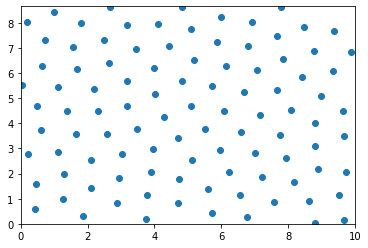

In [5]:
for t in tqdm(range(T-1)):
    for i in range(N):
        f = []      #list encoding magnitude of force
        d = [[],[]] #list encoding direction of force
        
        for j in range(N):
            if j!=i:
                dx = pos[t][0][i] - pos[t][0][j]
                dy = pos[t][1][i] - pos[t][1][j]
                #the bellow if statements make sure the shortest path between vertices is taken, taking into account the double periodic boundary
                if abs(dx) > dim*a/2:
                    dx = dx - np.sign(dx)*dim*a
                if abs(dy) > dim*b/2:
                    dy = dy - np.sign(dy)*dim*b

                mag = np.sqrt(dx**2 + dy**2)
                #if mag == 0:
                #    break
                d[0].append(dx/mag)       #proportion of force in the x direction
                d[1].append(dy/mag)       #proportion of force in the y direction
                f.append(mag)             #magnitude of force
                # print (t, i, j, f , dx, dy)

        
        force_x = sum(d[0]*spec.kn(1,f))*dt
        force_y = sum(d[1]*spec.kn(1,f))*dt
        # print(force_x, force_y)
        pos[t+1][0][i] = (pos[t][0][i] +  force_x ) % (dim*a)
        pos[t+1][1][i] = (pos[t][1][i] +  force_y ) % (dim*b)
        # print(pos[t+1,:,i])

plt.plot(pos[T-1][0][:], pos[T-1][1][:],'o')
plt.xlim(0, dim*a)
plt.ylim(0, dim*b)
plt.show()

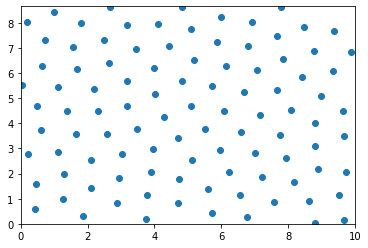

In [10]:
#initial setup plotted
fig, ax = plt.subplots()

# plt.plot(img_x, img_y,'o')
plt.plot(pos[T-1][0][:], pos[T-1][1][:],'o')
#for i in range(N):
#    plt.annotate(i, (pos[0,0,i],pos[0,1,i]))
plt.xlim(0, dim*a)
plt.ylim(0, dim*b)

#plt.savefig('final.png')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


done


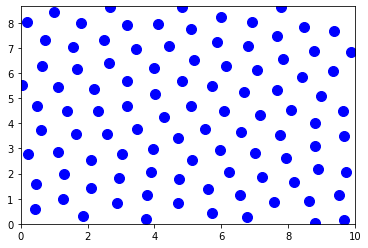

In [7]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

from matplotlib import animation


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, dim*a), ylim=(0, dim*b))
scat = ax.scatter(pos[:][:][0], pos[:][:][1], c='blue', s=100)

# initialization function: plot the background of each frame
def init():
    #print('init')
    trans = np.transpose((pos[0][0],pos[0][1]))
    scat.set_offsets(trans)
    return scat,

# animation function.  This is called sequentially
def animate(i):
    trans = np.transpose((pos[i][0],pos[i][1]))
    scat.set_offsets(trans)
    return scat,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=T, interval=25, blit = True)

anim.save('vortexes.gif') 
print ('done')

-0.7999999999999998 -2.8


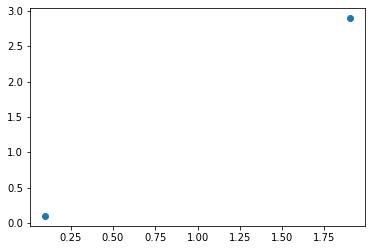

In [8]:
pos_test = np.empty((2,2))
pos_test[0][1] = 0.1      #x of low particle
pos_test[1][1] = 0.1      #y of low particle
pos_test[0][0] = 1.9      #x of high particle
pos_test[1][0] = 2.9      #y of high particle
dx = pos_test[0][1] - pos_test[0][0]
if abs(dx) > a/2:
   dx = dx - np.sign(dx)*a
dy =( pos_test[1][1] - pos_test[1][0])
print(dx, dy)
fig, ax = plt.subplots()
#print(pos[0][:], pos[1][:])

plt.plot(pos_test[0][:], pos_test[1][:],'o')

plt.show()